---
layout: single
title: 'Visualizing elevation contours from raster digital elevation models in Python'
date: 2016-07-26
authors: [Matt Oakley, Max Joseph]
category: [tutorials]
excerpt: 'This tutorial shows how to compute and plot contour lines for elevation from a raster DEM (digital elevation model).'
sidebar:
  nav:
author_profile: false
comments: true
lang: [python]
lib: [osgeo, numpy, matplotlib, elevation]
---

Digital elevation models (DEMs) are data in the format of a 2D array where each cell has a corresponding elevation value. Therefore, it may sometimes prove useful to visualize these elevation models with mechanisms such as contour lines. Fortunately, this is fairly easy to accomplish in Python using packages such as GDAL and Matplotlib.

## Objectives

- Read in DEM data
- Visualize data with Matplotlib

## Dependencies

- GDAL
- Matplotlib
- numpy
- elevation

In [1]:
from osgeo import gdal
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import elevation 

%matplotlib inline

## Fetch and read DEM data

The first objective we'll have to accomplish is acquiring and reading in our data. The data will be downloaded from the NASA SRTM mission via the `elevation` module's command line interface. 

In [2]:
!eio clip -o Shasta-30m-DEM.tif --bounds -122.6 41.15 -121.9 41.6 

make: Nothing to be done for `download'.
make: Nothing to be done for `all'.
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 -projwin -122.6 41.6 -121.9 41.15 SRTM1.vrt /Users/majo3748/Documents/earthlab/tutorials/python/Shasta-30m-DEM.tif


We can use GDAL in order to open the file and read it in as a 2D array. Additionally, it is important to note that our DEM file has NaN values which will later cause Matplotlib to fail. Therefore, we'll also mask these values out so that Matplotlib will be unaware of them.

In [3]:
filename = "Shasta-30m-DEM.tif"
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(np.float)
data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

## Visualize Data with Matplotlib

Now that we've read our data in, we're ready to visualize the elevation using contour lines within Matplotlib (Note: We will be re-reading in the data again here due to NaN values).

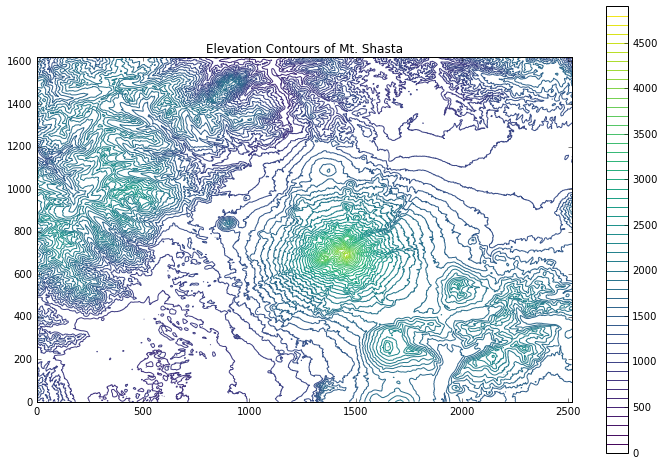

In [4]:
#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contour(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 100)))
plt.title("Elevation Contours of Mt. Shasta")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

We just used the 'contour' module to plot our data. Let's do it again but with 'contourf' to see filled contours.

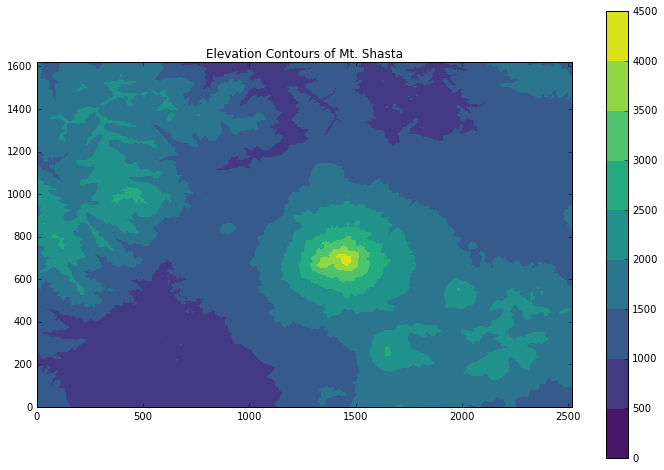

In [5]:
#Plot our data with Matplotlib's 'contourf'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contourf(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 500)))
plt.title("Elevation Contours of Mt. Shasta")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()